In [5]:
import cv2 as cv

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
cap = cv.VideoCapture('./data/UH_OBB_NOVEKVO_1_1_21_6_21.dat')

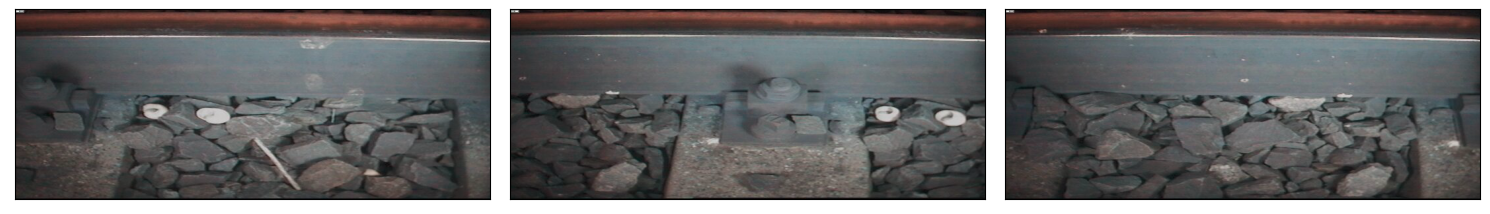

In [57]:
_, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True, sharey=True)
for a, ax in enumerate(axs):
    _, frame = cap.read()
    ax.imshow(frame)
    ax.set_yticks([])
    ax.set_xticks([])
    # cv.imwrite(f"./data/extracted_imgs/img_{a}.jpg", frame)


In [48]:
frames = 0
ret = True
while ret:
    ret, frame = cap.read()
    frames += 1
    
print(frames)

8719


In [45]:
params = [
    cv.CAP_PROP_POS_MSEC,
    cv.CAP_PROP_POS_FRAMES,
    cv.CAP_PROP_FRAME_WIDTH,
    cv.CAP_PROP_FRAME_HEIGHT,
    cv.CAP_PROP_FPS,
    cv.CAP_PROP_FRAME_COUNT,
]

for p in params:
    print(p, cap.get(p))

0 -7686143364045326.0
1 9.0
3 720.0
4 288.0
5 1200000.0
7 -9.223372036854776e+18
